In [2]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from transformers import CLIPProcessor, CLIPModel
import os
def load_model(model_path):
    """Loads the fine-tuned CLIP model and processor"""
    print(f"Loading model from: {model_path}")

    model = CLIPModel.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")

    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

    print("Model loaded successfully! Ready for inference.")
    return model, processor

def predict_image(image_path, text_options, model, processor):
    """
    Performs Zero-Shot Classification on a medical image.
    Args:
        image_path: Path to the image file
        text_options: List of strings (e.g., ["chest x-ray", "brain mri"])
        model: Loaded CLIPModel
        processor: Loaded CLIPProcessor
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"

    try:
        image = Image.open(image_path).convert("RGB")
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    inputs = processor(
        text=text_options,
        images=image,
        return_tensors="pt",
        padding=True
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)

    logits_per_image = outputs.logits_per_image
    probs = logits_per_image.softmax(dim=1)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis("off")
    plt.title("Input Image")

    plt.subplot(1, 2, 2)
    y_pos = range(len(text_options))
    scores = probs[0].cpu().numpy() * 100

    bars = plt.barh(y_pos, scores, align='center', color='skyblue')
    plt.yticks(y_pos, text_options)
    plt.xlabel('Confidence (%)')
    plt.title('CLIP Predictions')
    plt.xlim(0, 100)

    for i, v in enumerate(scores):
        plt.text(v + 1, i, f"{v:.1f}%", va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\n--- Diagnostic Confidence ---")

    scored_options = zip(text_options, scores)
    sorted_options = sorted(scored_options, key=lambda x: x[1], reverse=True)

    for label, score in sorted_options:
        print(f"{label:<30}: {score:.2f}%")


MODEL_PATH = "/content/drive/MyDrive/clip_roco_finetuning/best_model_hf"
if not os.path.exists('/content/drive'):
    from google.colab import drive
    drive.mount('/content/drive')

model, processor = load_model(MODEL_PATH)

TEST_IMAGE_PATH = "/content/Screenshot 2025-12-27 213511.png"



Loading model from: /content/drive/MyDrive/clip_roco_finetuning/best_model_hf
Model loaded successfully! Ready for inference.


In [23]:
CANDIDATE_LABELS = [
    "A X-ray of hand",
    "A chest x-ray showing the lungs",
    "A CT scan of the brain",
    "An CT scan of the abdomen",
    "An MRI of abdomen",
    "An MRI of the spine",
    "A gross pathology image" ,
    "aN EXRAY OF DENTAL"
]

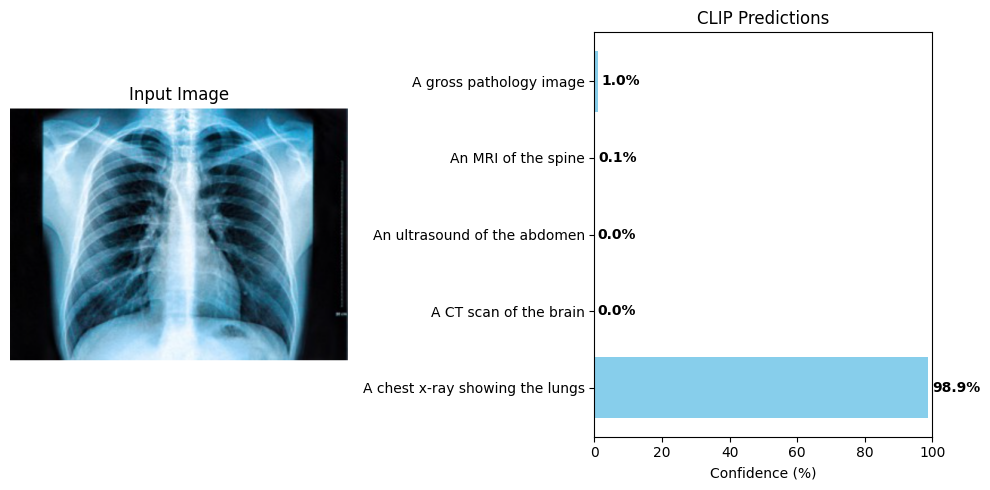


--- Diagnostic Confidence ---
A chest x-ray showing the lungs: 98.86%
A gross pathology image       : 1.00%
An MRI of the spine           : 0.13%
An ultrasound of the abdomen  : 0.00%
A CT scan of the brain        : 0.00%


In [3]:
predict_image(TEST_IMAGE_PATH, CANDIDATE_LABELS, model, processor)

In [6]:
labels = [
    "A x-ray",
    "A CT scan ",
    "An ultrasound ",
    "An MRI ",
    "A gross pathology image"
]

In [4]:
test_img2 = "/content/Screenshot 2025-12-27 213929.png"

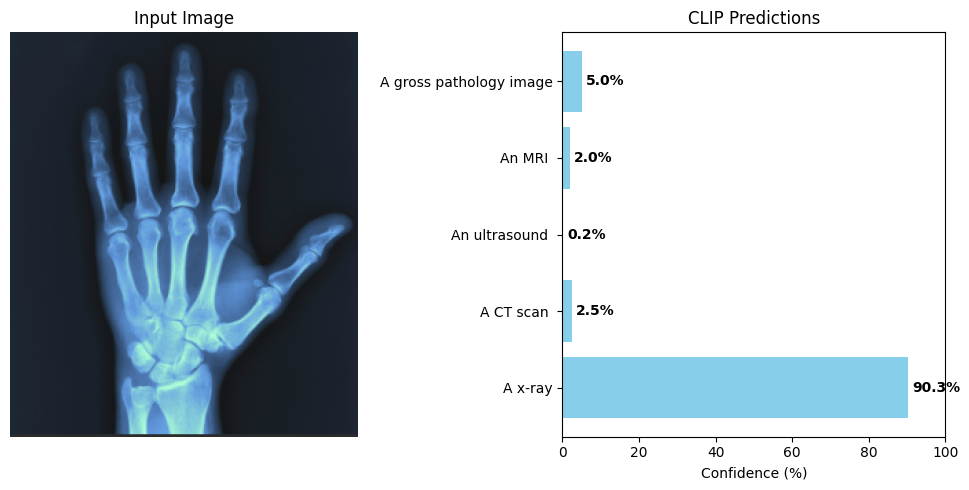


--- Diagnostic Confidence ---
A x-ray                       : 90.28%
A gross pathology image       : 5.00%
A CT scan                     : 2.55%
An MRI                        : 1.97%
An ultrasound                 : 0.21%


In [7]:
predict_image(test_img2, labels, model, processor)

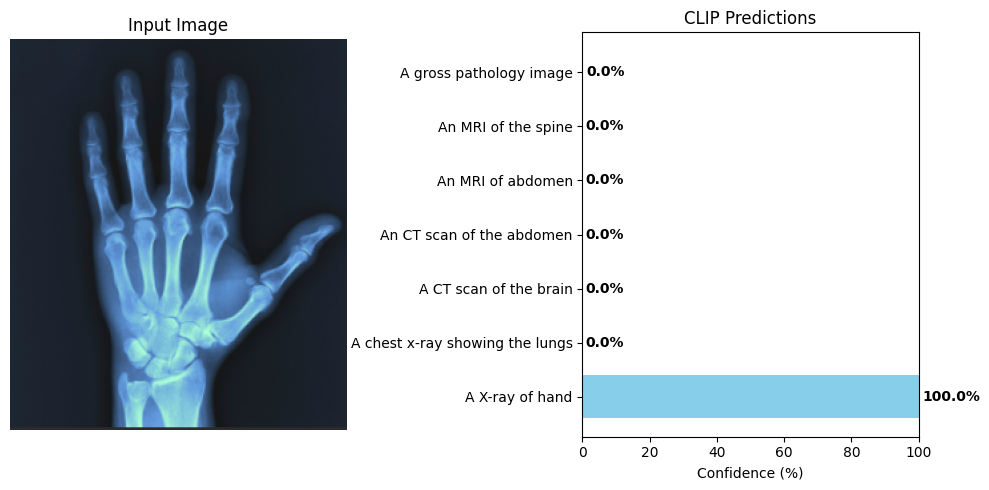


--- Diagnostic Confidence ---
A X-ray of hand               : 99.97%
A gross pathology image       : 0.02%
An MRI of the spine           : 0.00%
A chest x-ray showing the lungs: 0.00%
A CT scan of the brain        : 0.00%
An MRI of abdomen             : 0.00%
An CT scan of the abdomen     : 0.00%


In [11]:
predict_image(test_img2, CANDIDATE_LABELS, model, processor)

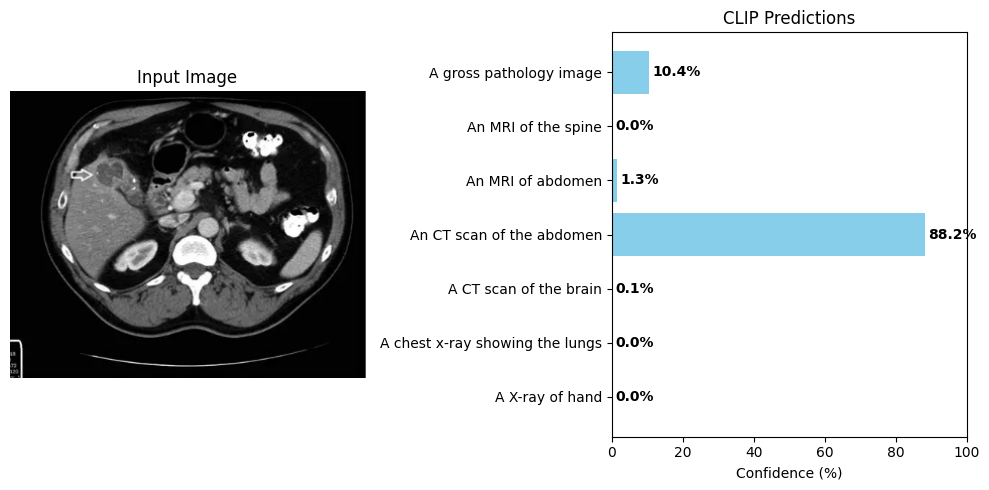


--- Diagnostic Confidence ---
An CT scan of the abdomen     : 88.22%
A gross pathology image       : 10.38%
An MRI of abdomen             : 1.34%
A CT scan of the brain        : 0.05%
An MRI of the spine           : 0.00%
A X-ray of hand               : 0.00%
A chest x-ray showing the lungs: 0.00%


In [12]:
test_img3 = "/content/Screenshot 2025-12-27 213848.png"
predict_image(test_img3, CANDIDATE_LABELS, model, processor)

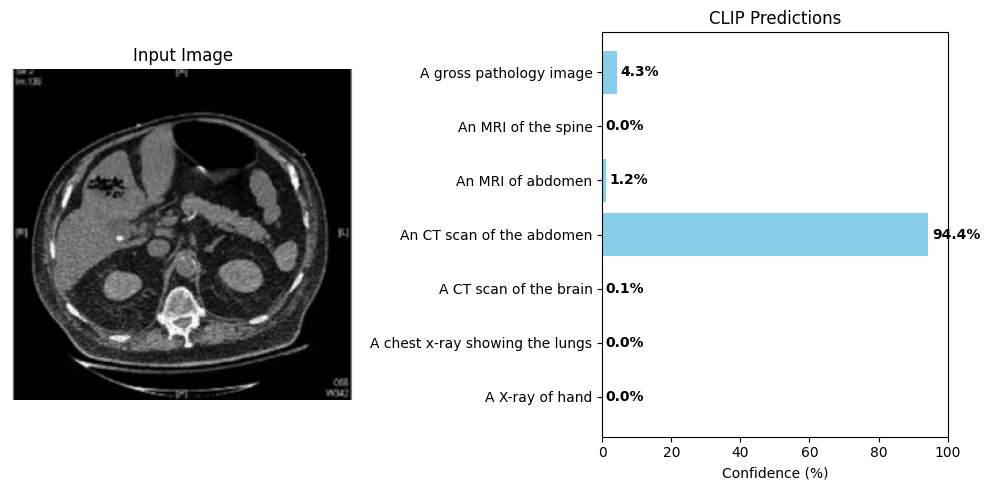


--- Diagnostic Confidence ---
An CT scan of the abdomen     : 94.45%
A gross pathology image       : 4.28%
An MRI of abdomen             : 1.20%
A CT scan of the brain        : 0.06%
An MRI of the spine           : 0.02%
A X-ray of hand               : 0.00%
A chest x-ray showing the lungs: 0.00%


In [13]:
test_img4 = "/content/Screenshot 2025-12-27 213750.png"
predict_image(test_img4, CANDIDATE_LABELS, model, processor)

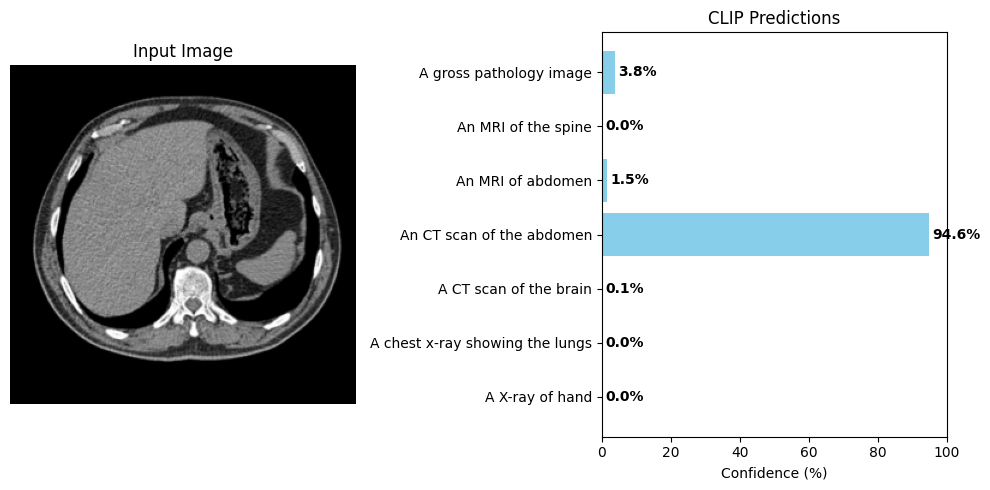


--- Diagnostic Confidence ---
An CT scan of the abdomen     : 94.64%
A gross pathology image       : 3.77%
An MRI of abdomen             : 1.52%
A CT scan of the brain        : 0.05%
An MRI of the spine           : 0.02%
A chest x-ray showing the lungs: 0.00%
A X-ray of hand               : 0.00%


In [14]:
test_img5 = "/content/Screenshot 2025-12-27 213803.png"
predict_image(test_img5, CANDIDATE_LABELS, model, processor)

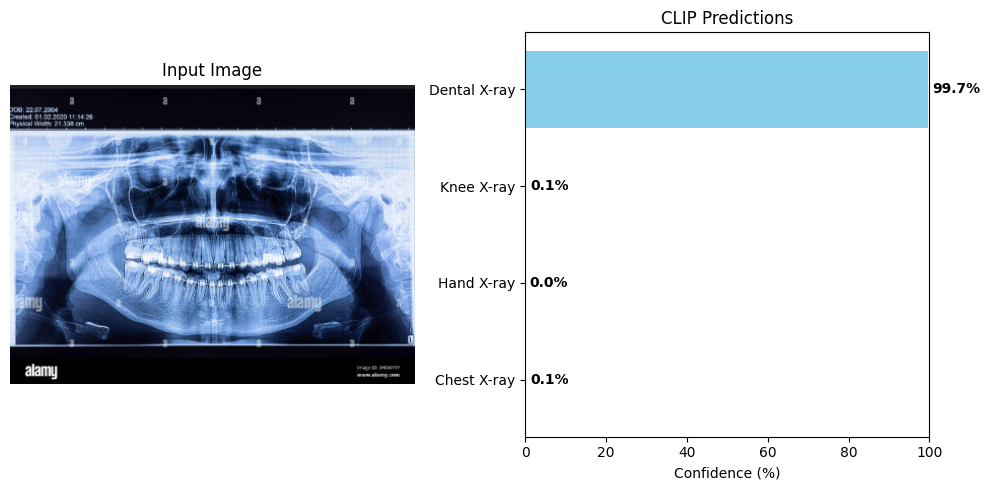


--- Diagnostic Confidence ---
Dental X-ray                  : 99.69%
Knee X-ray                    : 0.13%
Chest X-ray                   : 0.13%
Hand X-ray                    : 0.05%


In [28]:
test_img6 = "/content/Screenshot 2025-12-27 213957.png"
predict_image(test_img6, Labels, model, processor)

In [27]:
Labels = ["Chest X-ray", "Hand X-ray", "Knee X-ray", "Dental X-ray"]

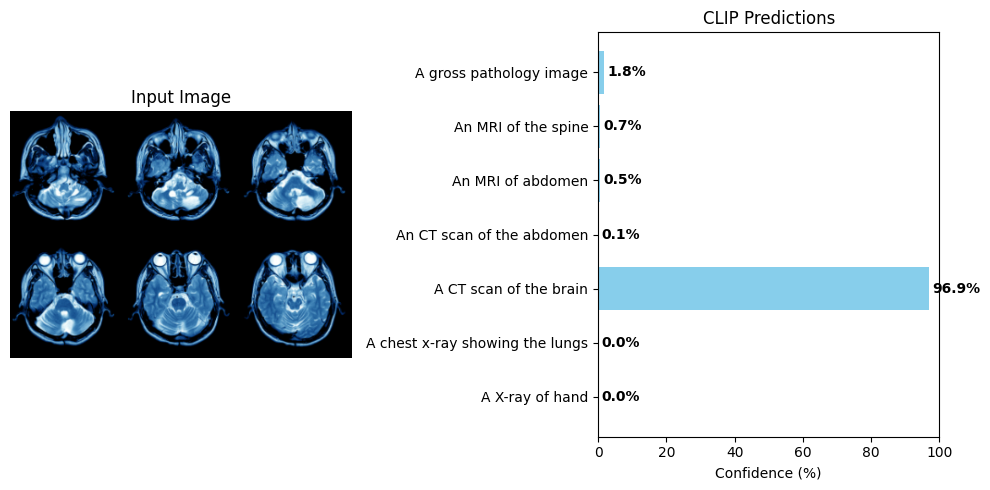


--- Diagnostic Confidence ---
A CT scan of the brain        : 96.87%
A gross pathology image       : 1.81%
An MRI of the spine           : 0.68%
An MRI of abdomen             : 0.53%
An CT scan of the abdomen     : 0.11%
A X-ray of hand               : 0.01%
A chest x-ray showing the lungs: 0.00%


In [16]:
test_img7 = "/content/Screenshot 2025-12-27 214055.png"
predict_image(test_img7, CANDIDATE_LABELS, model, processor)

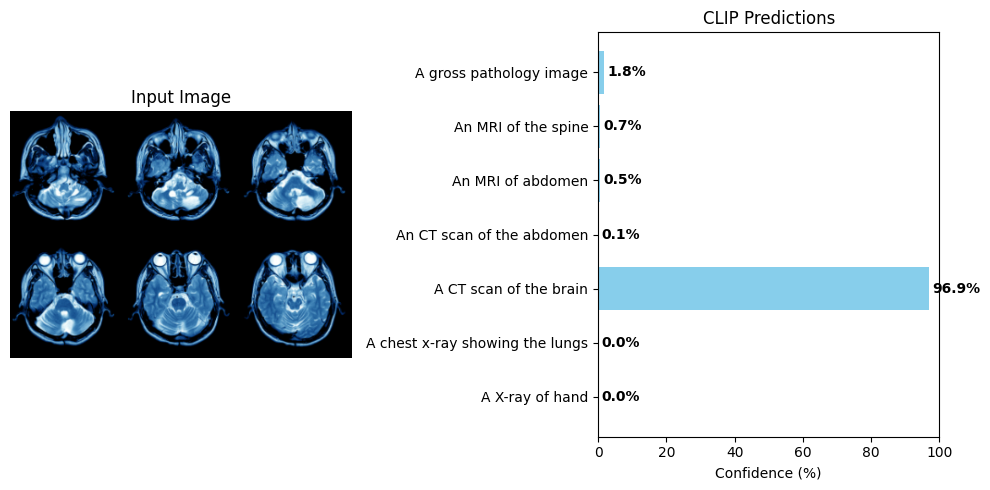


--- Diagnostic Confidence ---
A CT scan of the brain        : 96.87%
A gross pathology image       : 1.81%
An MRI of the spine           : 0.68%
An MRI of abdomen             : 0.53%
An CT scan of the abdomen     : 0.11%
A X-ray of hand               : 0.01%
A chest x-ray showing the lungs: 0.00%


In [17]:
test_img8 = "/content/Screenshot 2025-12-27 214055.png"
predict_image(test_img8, CANDIDATE_LABELS, model, processor)

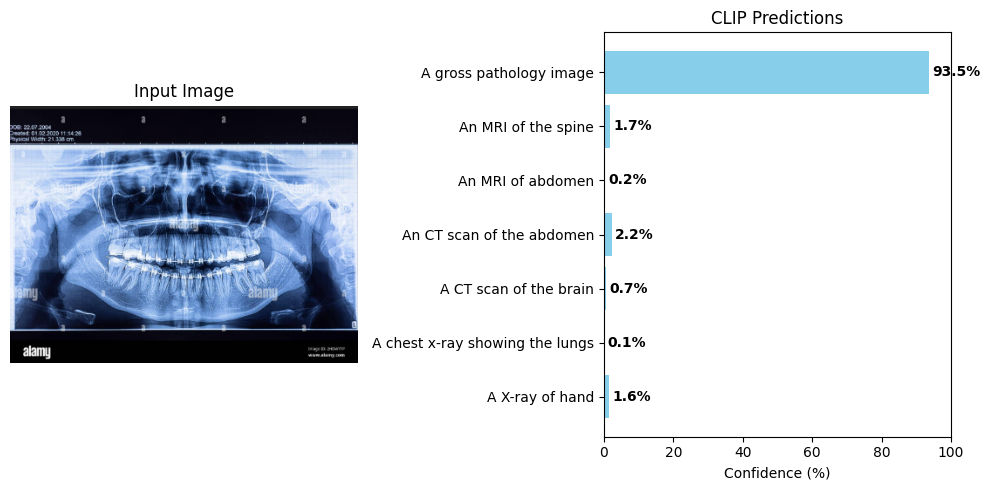


--- Diagnostic Confidence ---
A gross pathology image       : 93.54%
An CT scan of the abdomen     : 2.21%
An MRI of the spine           : 1.67%
A X-ray of hand               : 1.58%
A CT scan of the brain        : 0.65%
An MRI of abdomen             : 0.21%
A chest x-ray showing the lungs: 0.14%


In [18]:
test_img9 = "/content/Screenshot 2025-12-27 213957.png"
predict_image(test_img9, CANDIDATE_LABELS, model, processor)

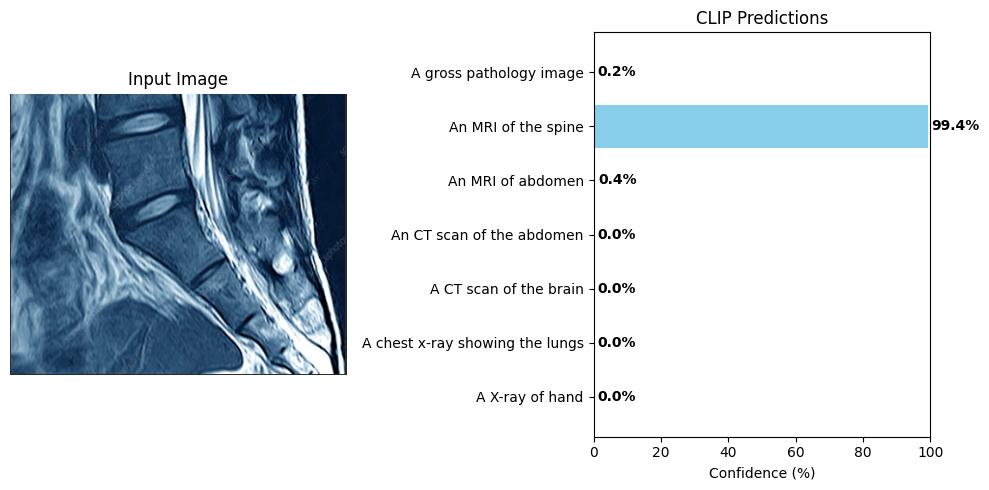


--- Diagnostic Confidence ---
An MRI of the spine           : 99.40%
An MRI of abdomen             : 0.38%
A gross pathology image       : 0.21%
A CT scan of the brain        : 0.00%
An CT scan of the abdomen     : 0.00%
A X-ray of hand               : 0.00%
A chest x-ray showing the lungs: 0.00%


In [19]:
test_img10 = "/content/Screenshot 2025-12-27 214128.png"
predict_image(test_img10, CANDIDATE_LABELS, model, processor)

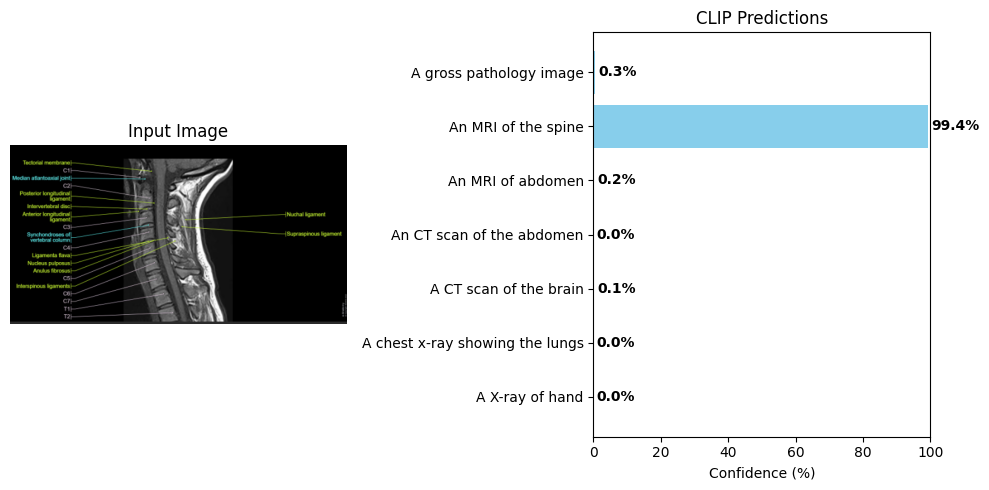


--- Diagnostic Confidence ---
An MRI of the spine           : 99.44%
A gross pathology image       : 0.32%
An MRI of abdomen             : 0.18%
A CT scan of the brain        : 0.06%
An CT scan of the abdomen     : 0.01%
A X-ray of hand               : 0.00%
A chest x-ray showing the lungs: 0.00%


In [20]:
test_img11 = "/content/Screenshot 2025-12-27 214154.png"
predict_image(test_img11, CANDIDATE_LABELS, model, processor)

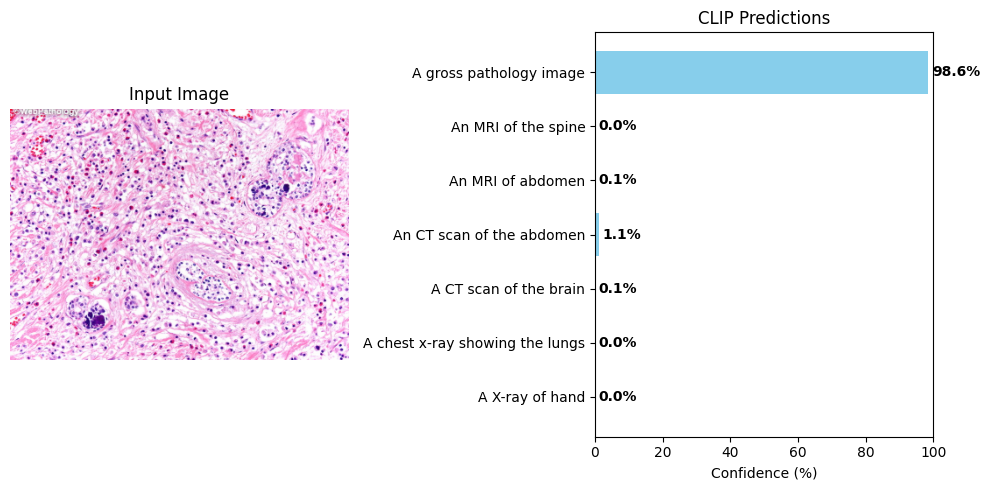


--- Diagnostic Confidence ---
A gross pathology image       : 98.58%
An CT scan of the abdomen     : 1.13%
An MRI of abdomen             : 0.15%
A CT scan of the brain        : 0.14%
An MRI of the spine           : 0.00%
A X-ray of hand               : 0.00%
A chest x-ray showing the lungs: 0.00%


In [21]:
test_img12 = "/content/Screenshot 2025-12-27 214246.png"
predict_image(test_img12, CANDIDATE_LABELS, model, processor)

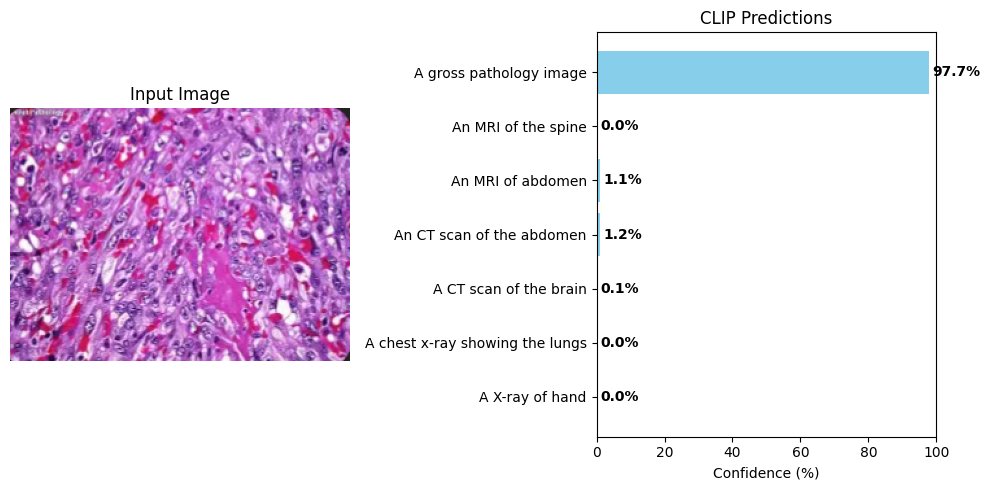


--- Diagnostic Confidence ---
A gross pathology image       : 97.72%
An CT scan of the abdomen     : 1.16%
An MRI of abdomen             : 1.06%
A CT scan of the brain        : 0.06%
An MRI of the spine           : 0.01%
A X-ray of hand               : 0.00%
A chest x-ray showing the lungs: 0.00%


In [22]:
test_img13 = "/content/Screenshot 2025-12-27 214257.png"
predict_image(test_img13, CANDIDATE_LABELS, model, processor)